In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

#### Generate two random vectors of length 100000 and perform vector multiplication with a for loop and with a numpy dot product. Time how the two methods perform.

In [2]:
#100000 is too much, i can't wait this anymore :)
rand_vect_1 = np.random.random((1000))
rand_vect_2 = np.random.random((1000))

%timeit np.dot(rand_vect_1, rand_vect_2)

826 ns ± 23.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [3]:
%%time
for i in range(len(rand_vect_1)):
    for j in range(len(rand_vect_2)):
        i*j

Wall time: 138 ms


#### Using pandas and matplotlib examples and documentation on the web, plot the distribution (histogram) of the scores of games from 2008. Find the mean of those scores and show it on the plot. Find out what genre has the highest mean score acrose the fool time period (hint: use groupby and mean()).

In [5]:
games=pd.read_csv('data\ign.csv')
games.head(1)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12


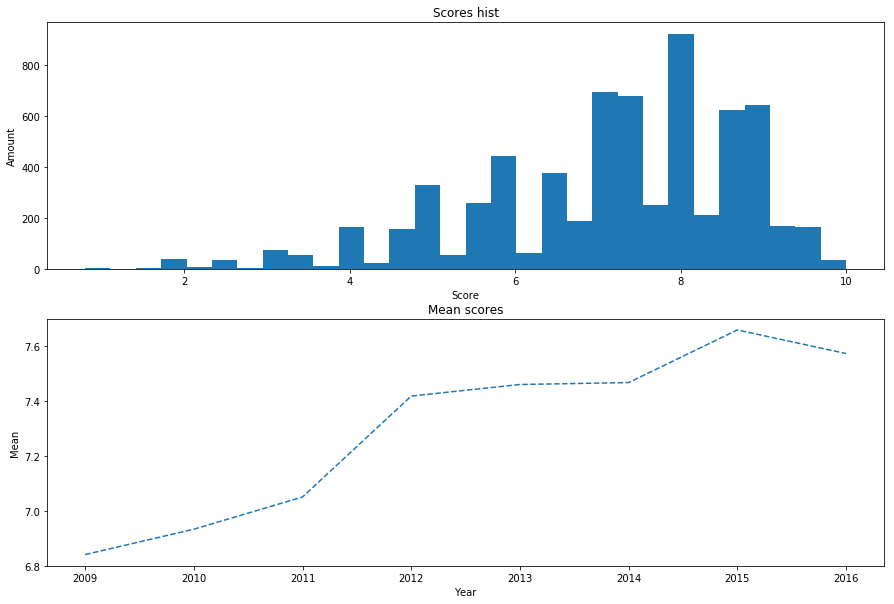

Biggest mean by genres: 
  genre
Compilation, Compilation    9.5
Name: score, dtype: float64


In [6]:
# Lets generate a bar plot this time 
fig,ax=plt.subplots(nrows=2,figsize=(15,10))

data=games[games['release_year'] > 2008][['score','release_year','genre']]
x=data['score']
y=data.groupby('release_year')['score'].mean()

ax[0].hist(x.values, bins=30)
ax[0].set(xlabel='Score', ylabel='Amount')
ax[0].set_title('Scores hist')

ax[1].plot(y.index, y.values, '--')
ax[1].set(xlabel='Year', ylabel='Mean')
ax[1].set_title('Mean scores')
plt.show()

mean_by_genres = games.groupby('genre')['score'].mean()
biggest_mean_by_genre = mean_by_genres.values.max()

print("Biggest mean by genres: \n ", mean_by_genres[mean_by_genres == biggest_mean_by_genre])

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#### Plot how the mean square error changes with the polynomial degree ranging between 1 and 30. Do this for the cosine and some other function of your choosing. See what happens if you increase the measurment noise. 


In [8]:
def getScores(degrees, X, y):
    scores_list = []
    for i in degrees:
        polynomial_features = PolynomialFeatures(degree=i,
                                             include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
        pipeline.fit(X[:, np.newaxis], y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
        scores_list.append(scores)
    return scores_list

In [9]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

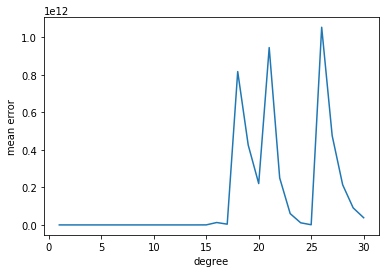

In [10]:
np.random.seed(0)
degrees = np.arange(1,31)
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

means = [-scorez.mean() for scorez in getScores(degrees, X, y)]

plt.plot(degrees, means)
plt.xlabel("degree")
plt.ylabel("mean error")
plt.show()

In [11]:
def myTrueFun(x):
    return np.sin( 4 * np.pi/2 * x)

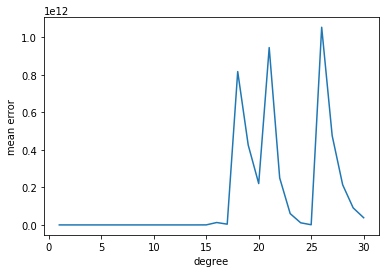

In [12]:
X = np.sort(np.random.rand(n_samples))
y = myTrueFun(X) + np.random.randn(n_samples) * 0.1

myMeans = [-scorez.mean() for scorez in getScores(degrees, X, y)]

plt.plot(degrees, means)
plt.xlabel("degree")
plt.ylabel("mean error")
plt.show()

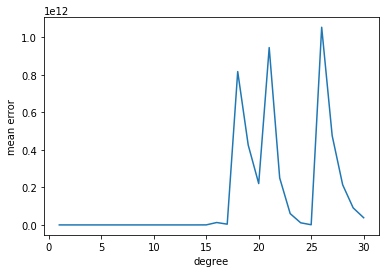

In [13]:
#More noisy
X = np.sort(np.random.rand(n_samples))
y = myTrueFun(X) + np.random.randn(n_samples) * 0.5

noisyMeans = [-scorez.mean() for scorez in getScores(degrees, X, y)]

plt.plot(degrees, means)
plt.xlabel("degree")
plt.ylabel("mean error")
plt.show()